<a href="https://colab.research.google.com/github/estebantarrifa07/CSV/blob/main/tarrifa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="http://www.sena.edu.co/Paginas/btl/assets_btl/images_btl/SVG/Logo%20SENA.svg" width="240" height="240" align="right"/>

<center><h1>PRODEMIA</header1></center>
<left><h1>Actividad 1. Laboratorio: Tratamiento y limpieza de datos</header1></left>

Presentado por: Nombres Apellidos  <br>
Fecha: DD/MM/2026

## Caracterización del Dataset

Se incluye una descripción de los datos.

En esta etapa buscamos identificar:

>- Tipos de datos incorrectos  
>- Patrones de valores faltantes  
>- Duplicados  
>- Columnas que requieren estandarización  
>- Posibles conversiones necesarias  

**Analogía:**  
Es como un médico que evalúa a un paciente antes de recetar tratamiento.

Se incorporá una descripción (EDA) del conjunto de datos utilizado. Se analiza el dataset proporcionando, se muestra al menos algunas de sus características mediante tablas y al menos algunas de ellas en modo gráfico (p.ej., histogramas, diagramas de dispersión, diagramas de cajas y bigotes, etc.)

## Importación de librerias necesarias

In [ ]:
#Para esta actividad se importarán las siguientes librerías:
import pandas as pd

## Cargar el Dataset

In [ ]:
#Código para cargar el Dataset
import pandas as pd
ucsv_rl = 'https://raw.githubusercontent.com/hmedrano1979/ITC/refs/heads/main/titanic_sintetico_con_problemas.csv'

# Leemos el archivo CSV directamente desde la URL
df_csv = pd.read_csv(ucsv_rl)

# Mostramos las primeras filas para verificar
df_csv.head(530)

,survived,pclass,sex,age,fare,embarked,booking_date,ticket
0,0,1,male,51.9,10.06,S,08/04/1912,PC 17599
1,1,3,male,29.1,6.08,S,1912-01-02,STON/O2. 3101282
2,0,3,male,22.2,16.65,s,1912-01-03,STON/O2. 3101282
3,0,3,female,56.3,3.62,S,01/09/1912,113803
4,0,3,male,9.7,19.27,C,02/10/1912,113803
...,...,...,...,...,...,...,...,...
525,0,3,male,66.4,11.67,C,1913-06-09,PC 17599
526,0,2,Female,NaN,5.07,C,21/02/1912,STON/O2. 3101282
527,1,2,male,5.3,"8,200.50",S,1913-06-11,373450
528,1,3,male,40.5,10.17,Q,1913-06-12,W.E.P. 5736


In [ ]:
# Este código calcula la cantidad de valores nulos (NaN) en cada columna del DataFrame `df_csv`.
# Es útil para identificar rápidamente las columnas con datos faltantes y la extensión de estos problemas.
df_csv.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,44
fare,7
embarked,21
booking_date,0
ticket,0


In [ ]:
# Este código muestra un resumen conciso del DataFrame `df_csv`.
# Incluye el tipo de datos de cada columna, el número de valores no nulos y el uso total de memoria.
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   survived      630 non-null    int64   
 1   pclass        630 non-null    int64   
 2   sex           630 non-null    category
 3   age           586 non-null    float64 
 4   fare          623 non-null    float64 
 5   embarked      609 non-null    object  
 6   booking_date  630 non-null    object  
 7   ticket        630 non-null    object  
dtypes: category(1), float64(2), int64(2), object(3)
memory usage: 35.3+ KB


# sex


*  esta columna es el sexo de los pasajeros del titanic,su variable es nominal.

* su tipo de datos es category

* cuenta con  630 registro.

* campos completos

que se identifico:

1.  falta de estandalizacion
2.   tipo de texto str y mostraba el dtype como object








## Resumen de Problemas y Soluciones Identificados

Durante la fase de exploración y limpieza de datos, se identificaron y solucionaron los siguientes problemas principales en el `DataFrame`:

### Problema 1: Falta de Estandarización

## Problema 2:Tipo de Datos Incorrecto

**Descripción:** La columna 'sex' contenía valores inconsistentes como 'male', 'female', 'MALE', ' Female ', lo que dificultaba un análisis uniforme. Además, su tipo de dato era 'object' (cadena de texto genérica), cuando lo ideal para una variable categórica es el tipo 'category' para optimizar el rendimiento y la memoria.

**Solución:** Se aplicaron operaciones para convertir todos los valores a minúsculas (`.str.lower()`) y eliminar cualquier espacio en blanco redundante (`.str.strip()`), estandarizando así las entradas. Posteriormente, la columna fue convertida al tipo de dato `category`.

**Código utilizado para la solución:**

```python
df_csv['sex'] = df_csv['sex'].str.lower().str.strip()
df_csv['sex'] = df_csv['sex'].astype("category")


In [ ]:
# Este código verifica y cuenta los tipos de datos de cada elemento en la columna 'sex',
# lo cual es útil para identificar inconsistencias.
print(df_csv['sex'].apply(type).value_counts())

sex
<class 'str'>    630
Name: count, dtype: int64


In [ ]:
# Este código muestra un resumen conciso de la columna 'sex' del DataFrame `df_csv`.
# Incluye el tipo de datos, el número de valores no nulos y el uso de memoria de la serie.
df_csv["sex"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 630 entries, 0 to 629
Series name: sex
Non-Null Count  Dtype 
--------------  ----- 
630 non-null    object
dtypes: object(1)
memory usage: 5.1+ KB


In [ ]:
(df_csv['sex'].apply(type).value_counts())

,count
sex,
<class 'str'>,630


El código `(df_csv['sex'].apply(type).value_counts())` se utiliza para:  
-   **Verificar Tipos de Datos:** Identifica el tipo de dato de cada elemento dentro de la columna 'sex'.  
-   **Contar Frecuencia:** Agrupa y cuenta cuántas veces aparece cada tipo de dato diferente.  

Esto es útil para detectar inconsistencias, por ejemplo, si se espera que una columna contenga solo cadenas de texto pero se encuentran números o valores nulos de otro tipo.

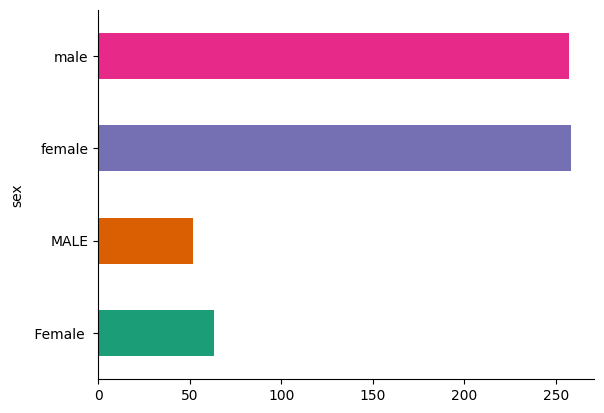

In [ ]:
# Importa la librería pyplot de matplotlib para la creación de gráficos.
from matplotlib import pyplot as plt

# Importa la librería seaborn para visualizaciones de datos mejoradas.
import seaborn as sns

# Agrupa el DataFrame por la columna 'sex', cuenta los valores y crea un gráfico de barras horizontal.
df_csv.groupby('sex').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))

# Oculta los bordes superior y derecho del gráfico para una apariencia más limpia.
plt.gca().spines[['top', 'right',]].set_visible(False)


In [ ]:
#valores unicos de sex
df_csv['sex'].unique()

array(['male', 'female', 'MALE', ' Female '], dtype=object)

In [ ]:
# Convierte el texto a minúsculas y elimina espacios en blanco para estandarizar la columna 'sex'.
df_csv['sex'] = df_csv['sex'].str.lower().str.strip()

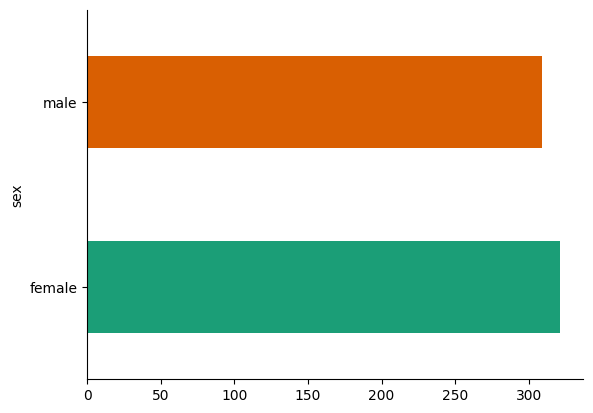

In [ ]:
# Importa la librería pyplot de matplotlib para la creación de gráficos.
from matplotlib import pyplot as plt

# Importa la librería seaborn para visualizaciones de datos mejoradas.
import seaborn as sns

# Agrupa el DataFrame por la columna 'sex', cuenta los valores y crea un gráfico de barras horizontal.
df_csv.groupby('sex').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))

# Oculta los bordes superior y derecho del gráfico para una apariencia más limpia.
plt.gca().spines[['top', 'right',]].set_visible(False)


In [ ]:
#valores unicos de sex
df_csv['sex'].unique()

array(['male', 'female'], dtype=object)

In [ ]:
# Convierte la columna 'sex' a tipo categórico para optimizar memoria y mejorar el rendimiento.
df_csv['sex'] = df_csv['sex'].astype("category")

# Muestra un resumen conciso del DataFrame `df_csv`, incluyendo los tipos de datos actualizados.
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   survived      630 non-null    int64   
 1   pclass        630 non-null    int64   
 2   sex           630 non-null    category
 3   age           586 non-null    float64 
 4   fare          623 non-null    object  
 5   embarked      609 non-null    object  
 6   booking_date  630 non-null    object  
 7   ticket        630 non-null    object  
dtypes: category(1), float64(1), int64(2), object(4)
memory usage: 35.3+ KB


In [ ]:
df_csv.head()

,survived,pclass,sex,age,fare,embarked,booking_date,ticket
0,0,1,male,51.9,10.06,S,08/04/1912,PC 17599
1,1,3,male,29.1,6.08,S,1912-01-02,STON/O2. 3101282
2,0,3,male,22.2,16.65,s,1912-01-03,STON/O2. 3101282
3,0,3,female,56.3,3.62,S,01/09/1912,113803
4,0,3,male,9.7,19.27,C,02/10/1912,113803


In [ ]:
# Crea una nueva columna 'ciudad_clean' estandarizando los valores de la columna 'ciudad'.
# Convierte a string, elimina espacios y pasa a minúsculas para una limpieza consistente.
df_csv['sex_clean'] = (
    df_csv['sex']
        .astype(str)
        .str.strip()
        .str.lower()
)

In [ ]:
# Elimina la columna 'sex_clean' del DataFrame.
df_csv = df_csv.drop('sex_clean', axis=1)

# Muestra las primeras filas del DataFrame para verificar que la columna ha sido eliminada.
df_csv.head()

,survived,pclass,sex,age,fare,embarked,booking_date,ticket
0,0,1,male,51.9,10.06,S,08/04/1912,PC 17599
1,1,3,male,29.1,6.08,S,1912-01-02,STON/O2. 3101282
2,0,3,male,22.2,16.65,s,1912-01-03,STON/O2. 3101282
3,0,3,female,56.3,3.62,S,01/09/1912,113803
4,0,3,male,9.7,19.27,C,02/10/1912,113803


In [ ]:
df_csv.head()

,survived,pclass,sex,age,fare,embarked,booking_date,ticket
0,0,1,male,51.9,10.06,S,08/04/1912,PC 17599
1,1,3,male,29.1,6.08,S,1912-01-02,STON/O2. 3101282
2,0,3,male,22.2,16.65,s,1912-01-03,STON/O2. 3101282
3,0,3,female,56.3,3.62,S,01/09/1912,113803
4,0,3,male,9.7,19.27,C,02/10/1912,113803


df_csv.info()

# fare

* este columna es la tarifa pagada por el boleto de cada pasajero que viajaba en el titanic

* variable numerica continua

* su tipo de datos es
cuantitativo

* cuenta con 630 registro

* 630 campos completos

que se identifico:

 1. Formato inconsistente
 2. Tipos mezclados como   float y strings
 3. 7 campos faltantes







## Resumen de Problemas y Soluciones Identificados para la Columna 'fare'

Durante la fase de exploración y limpieza de datos, se identificaron y solucionaron los siguientes problemas principales en la columna `fare` del `DataFrame`:

### Problema 1: Formato Inconsistente y Tipos de Datos Mezclados (Float y Strings)

**Descripción:** La columna `fare` presentaba un formato inconsistente (ej. '8,200.50') y sus tipos de datos estaban mezclados, incluyendo `float` y `strings`. Esto la cargó inicialmente como un tipo `object`, impidiendo su tratamiento directo como números.

**Solución:** Para estandarizar el formato y permitir operaciones numéricas, se realizó una conversión a tipo flotante. Esto incluyó:
*   Asegurar que los valores fueran tratados como cadenas (`.astype(str)`).
*   Eliminar las comas (`','`) para limpiar el formato (`.str.replace(',', '', regex=False)`).
*   Utilizar `pd.to_numeric` con `errors='coerce'` para convertir los valores a tipo flotante, reemplazando cualquier valor que no pudiera convertirse con `NaN`.

**Código utilizado para la solución:**

```python
df_csv['fare'] = pd.to_numeric(
    df_csv['fare'].astype(str).str.replace(',', '', regex=False),
    errors='coerce'
)
```

### Problema 2: Campos Faltantes (NaN)

**Descripción:** Se identificaron valores faltantes (NaN) en la columna `fare`. Esto incluye tanto los campos originalmente ausentes como los valores que resultaron en `NaN` debido a la conversión de formatos inconsistentes.

**Solución:** Se rellenaron todos los valores nulos con 0 para asegurar que la columna estuviera completa y lista para cualquier análisis o cálculo posterior.

**Código utilizado para la solución:**

```python
df_csv['fare'].fillna(0, inplace=True)
```

In [ ]:
# Este código verifica y cuenta los tipos de datos de cada elemento en la columna 'sex',
(df_csv['fare'].apply(type).value_counts())

,count
fare,
<class 'float'>,630


In [ ]:
# Este código muestra un resumen conciso de la columna 'sex' del DataFrame `df_csv`.
# Incluye el tipo de datos, el número de valores no nulos y el uso de memoria de la serie.
df_csv["fare"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 630 entries, 0 to 629
Series name: fare
Non-Null Count  Dtype  
--------------  -----  
630 non-null    float64
dtypes: float64(1)
memory usage: 5.1 KB


In [ ]:
# Este código calcula la cantidad de valores nulos (NaN) en cada columna del DataFrame `df_csv`.
df_csv.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,44
fare,0
embarked,21
booking_date,0
ticket,0


In [ ]:
# Rellena los valores nulos (NaN) en la columna 'fare' con 0.
# Esto asegura que no haya datos faltantes en esta columna, lo que puede ser importante para análisis posteriores.
df_csv['fare'].fillna(0, inplace=True)

# Vuelve a calcular y mostrar la cantidad de valores nulos por columna para verificar el cambio en 'fare'.
df_csv.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,44
fare,0
embarked,21
booking_date,0
ticket,0


In [ ]:
#quitamos el simbolo de dolar y la coma de miles
df_csv['fare'] = df_csv['fare'].str.replace('$', '').str.replace(',', '')

AttributeError: Can only use .str accessor with string values!

In [ ]:
# Este código convierte
#la columna 'fare' a un tipo de dato numérico.
df_csv['fare'] = pd.to_numeric(df_csv['fare'])

In [ ]:
 # Este código convierte la columna 'fare' a tipo numérico (flotante).
df_csv['fare'] = df_csv['fare'].astype(float)



In [ ]:
# Filtra y muestra solo los valores que no son numéricos en la columna 'fare'.
# Utiliza pd.to_numeric con errors='coerce' para convertir a número y reemplazar los no numéricos con NaN.
# Luego, filtra por los valores NaN para identificar los elementos originales que no eran numéricos.
# Finalmente, muestra los valores únicos de esos elementos.
print(df_csv[pd.to_numeric(df_csv['fare'], errors='coerce').isna()]['fare'].unique())

[]


In [ ]:
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   survived      630 non-null    int64   
 1   pclass        630 non-null    int64   
 2   sex           630 non-null    category
 3   age           586 non-null    float64 
 4   fare          630 non-null    float64 
 5   embarked      609 non-null    object  
 6   booking_date  630 non-null    object  
 7   ticket        630 non-null    object  
dtypes: category(1), float64(2), int64(2), object(3)
memory usage: 35.3+ KB


In [ ]:
df_csv.head(30)

,survived,pclass,sex,age,fare,embarked,booking_date,ticket
0,0,1,male,51.9,10.06,S,08/04/1912,PC 17599
1,1,3,male,29.1,6.08,S,1912-01-02,STON/O2. 3101282
2,0,3,male,22.2,16.65,s,1912-01-03,STON/O2. 3101282
3,0,3,female,56.3,3.62,S,01/09/1912,113803
4,0,3,male,9.7,19.27,C,02/10/1912,113803
5,1,3,male,-0.8,13.22,C,26/05/1912,S.O.C. 14879
6,0,3,female,36.2,10.25,NaN,1912-01-07,113803
7,0,2,male,23.0,4.15,S,1912-01-08,A/5 21171
8,0,3,male,15.7,22.44,C,09/06/1912,PC 17599
9,1,2,female,NaN,9.72,Q,1912-01-10,S.O.C. 14879


In [ ]:
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   survived      630 non-null    int64   
 1   pclass        630 non-null    int64   
 2   sex           630 non-null    category
 3   age           586 non-null    float64 
 4   fare          630 non-null    float64 
 5   embarked      609 non-null    object  
 6   booking_date  630 non-null    object  
 7   ticket        630 non-null    object  
dtypes: category(1), float64(2), int64(2), object(3)
memory usage: 35.3+ KB
